In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

# Import

In [2]:
import pickle

X_test = pickle.load(open("X_test.p", "rb"))
y_test = pickle.load(open("y_test.p", "rb" ))

# SMOTE datasets

X_train_smote = pickle.load(open("X_train_smote.p", "rb"))
y_train_smote = pickle.load(open("y_train_smote.p", "rb"))

# Undersampled datasets

X_train_under = pickle.load(open("X_train_under.p", "rb" ))
y_train_under = pickle.load(open("y_train_under.p", "rb" ))

X = pickle.load(open("X.p", "rb"))
Xdf = pd.DataFrame(X)

In [3]:
#X_train_under = X_train_under.drop(['age'], axis=1)
#X_test = X_test.drop(['age'], axis=1)

In [4]:
names = list(X.columns)

names

['patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'Numeric_diag_1',
 'Numeric_diag_2',
 'Numeric_diag_3',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'age_0-10)',
 'age_10-20)',
 'age_20-30)',
 'age_30-40)',
 'age_40-50)',
 'age_50-60)',
 'age_60-70)',
 'age_70-80)',
 'age_80-90)',
 'age_90-100)',
 'Med_Spec_Missing',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Cardiology',
 'Med_Spec_Surgery-General',
 'Med_Spec_Nephrology',
 'Med_Spec_Other',
 'DXDiabetes',
 'DXLipid',
 'DXFluid',
 'DXHypertension',
 'DXHTN_Kidney',
 'DXHeartAttack',
 'DXHeartDisease',
 'DXDysrhythm',
 'DXHeartFailure',
 'DXCVD',
 'DXPneumonia',
 'DXAirway',
 'DXUreth

In [5]:
namesu = list(X_train_under.columns)

namesu

['patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'Numeric_diag_1',
 'Numeric_diag_2',
 'Numeric_diag_3',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'age_0-10)',
 'age_10-20)',
 'age_20-30)',
 'age_30-40)',
 'age_40-50)',
 'age_50-60)',
 'age_60-70)',
 'age_70-80)',
 'age_80-90)',
 'age_90-100)',
 'Med_Spec_Missing',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Cardiology',
 'Med_Spec_Surgery-General',
 'Med_Spec_Nephrology',
 'Med_Spec_Other',
 'DXDiabetes',
 'DXLipid',
 'DXFluid',
 'DXHypertension',
 'DXHTN_Kidney',
 'DXHeartAttack',
 'DXHeartDisease',
 'DXDysrhythm',
 'DXHeartFailure',
 'DXCVD',
 'DXPneumonia',
 'DXAirway',
 'DXUreth

In [6]:
X_train_under.head(5)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,90330768,2,1,7,1,38,0,18,0,0,...,0,1,0,1,1,0,0,1,1,0
1,191691,1,1,6,1,55,0,6,0,0,...,0,1,0,1,1,0,1,0,0,1
2,84325293,1,6,7,6,59,0,14,0,1,...,0,1,0,1,1,0,0,1,0,1
3,1346517,2,1,1,2,41,1,10,0,0,...,0,1,0,1,1,0,0,1,0,1
4,66304629,1,3,7,5,74,0,8,0,0,...,0,1,0,1,1,0,1,0,0,1


# ADA Boost
## SMOTE

In [7]:
from sklearn.ensemble import AdaBoostClassifier

#create a dictionary of parameters 
param_grid = {'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800],
'learning_rate':[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4],              
'random_state':[0, 27, 42]}

# create Ada Boost model 
ab_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
ab_clf = RandomizedSearchCV(ab_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [8]:
ab_clf.fit(X_train_smote, y_train_smote.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 48.1min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 51.8min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.2, 1.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [9]:
print("Best parameter set found on training set:")
print()
print(ab_clf.best_params_)
print("Best estimator set found on training set:")
print()
print(ab_clf.best_estimator_)

# Save the best estimator statement for use below
ab_clf_best = ab_clf.best_estimator_
ab_clf_best

Best parameter set found on training set:

{'random_state': 27, 'n_estimators': 700, 'learning_rate': 1}
Best estimator set found on training set:

AdaBoostClassifier(learning_rate=1, n_estimators=700, random_state=27)


AdaBoostClassifier(learning_rate=1, n_estimators=700, random_state=27)

#### parameters

AdaBoostClassifier(learning_rate=1, n_estimators=700, random_state=27)

In [10]:
y_pred_test_ab = ab_clf_best.predict(X_test)

y_pred_class_test_ab = ab_clf_best.predict_proba(X_test)

In [32]:
print("TEST")
print(" ")
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test,y_pred_test_ab))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_test,y_pred_test_ab))

TEST
 
confusion matrix: 
[[26266   269]
 [ 3150   163]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     26535
           1       0.38      0.05      0.09      3313

    accuracy                           0.89     29848
   macro avg       0.64      0.52      0.51     29848
weighted avg       0.84      0.89      0.84     29848



In [12]:
# limit to probability for class = 1 
base_probs_ab = y_pred_class_test_ab[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ", metrics.roc_auc_score(y_test, base_probs_ab))

ROC AUC score (test):  0.6447705452098957


In [33]:
y_pred_train_ab = ab_clf_best.predict(X_train_smote)

# limit to probability for class = 1 
y_pred_train_class_ab = ab_clf_best.predict_proba(X_train_smote)

base_probs_train_ab = y_pred_train_class_ab[:,1]

print("TRAIN")
print(" ")
print("confusion matrix: ")
print(metrics.confusion_matrix(y_train_smote,y_pred_train_ab))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_train_smote,y_pred_train_ab))

# calculate roc_auc_score
print("ROC AUC score (train): ",metrics.roc_auc_score(y_train_smote, base_probs_train_ab))

TRAIN
 
confusion matrix: 
[[61143   645]
 [ 8344 53444]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     61788
           1       0.99      0.86      0.92     61788

    accuracy                           0.93    123576
   macro avg       0.93      0.93      0.93    123576
weighted avg       0.93      0.93      0.93    123576

ROC AUC score (train):  0.9559477681615345


## Undersampled

In [14]:
from sklearn.ensemble import AdaBoostClassifier

#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800],
'learning_rate':[0.2,0.4,0.6,0.8,1, 1.2, 1.4],              
'random_state':[0,27,42]}

# create Ada Boost model 
ab_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
abu_clf = RandomizedSearchCV(ab_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [15]:
abu_clf.fit(X_train_under, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  4.1min remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.2, 1.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [16]:
print("Best parameter set found on training set:")
print()
print(abu_clf.best_params_)
print("Best estimator set found on training set:")
print()
print(abu_clf.best_estimator_)

# Save the best estimator statement for use below
abu_clf_best = abu_clf.best_estimator_
abu_clf_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 400, 'learning_rate': 0.4}
Best estimator set found on training set:

AdaBoostClassifier(learning_rate=0.4, n_estimators=400, random_state=0)


AdaBoostClassifier(learning_rate=0.4, n_estimators=400, random_state=0)

####  best parameters

AdaBoostClassifier(learning_rate=0.4, n_estimators=400, random_state=0)

In [17]:
y_pred_test_abu = abu_clf_best.predict(X_test)

y_pred_class_test_abu = abu_clf_best.predict_proba(X_test)

In [18]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test,y_pred_test_abu))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_test,y_pred_test_abu))

confusion matrix: 
[[17661  8874]
 [ 1427  1886]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.93      0.67      0.77     26535
           1       0.18      0.57      0.27      3313

    accuracy                           0.65     29848
   macro avg       0.55      0.62      0.52     29848
weighted avg       0.84      0.65      0.72     29848



In [19]:
# limit to probability for class = 1 
base_probs_abu = y_pred_class_test_abu[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ", metrics.roc_auc_score(y_test, base_probs_abu))

ROC AUC score (test):  0.6628824466896458


In [20]:
y_pred_train_abu = abu_clf_best.predict(X_train_under)

# limit to probability for class = 1 
y_pred_train_class_abu = abu_clf_best.predict_proba(X_train_under)

base_probs_train_abu = y_pred_train_class_abu[:,1]

print("confusion matrix: ")
print(metrics.confusion_matrix(y_train_under,y_pred_train_abu))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_train_under,y_pred_train_abu))

# calculate roc_auc_score
print("ROC AUC score (train): ",metrics.roc_auc_score(y_train_under, base_probs_train_abu))

confusion matrix: 
[[5359 2497]
 [3175 4681]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      7856
           1       0.65      0.60      0.62      7856

    accuracy                           0.64     15712
   macro avg       0.64      0.64      0.64     15712
weighted avg       0.64      0.64      0.64     15712

ROC AUC score (train):  0.6945941778256064


## Feature selection

In [21]:
ada15 = pd.Series(ab_clf_best.feature_importances_, index=names).nlargest(16)

# not including patient_nbr so asked for 16

print(ada15)

#ADA15names = ['discharge_disposition_id', 'admission_type_id', 'Med_Spec_Missing', 'Med_Spec_InternalMedicine', 
#            'num_lab_procedures', 'Med_Spec_Other', 'Med_Spec_Emergency/Trauma', 'Med_Spec_Family/GeneralPractice', 
#            'Med_Spec_Cardiology', 'num_medications', 'Med_Spec_Surgery-General', 'number_inpatient', 
#            'Med_Spec_Nephrology', 'number_diagnoses', 'admission_source_id']

ADA15names = ['discharge_disposition_id', 'number_inpatient', 'Numeric_diag_1', 'Numeric_diag_3', 'time_in_hospital',        
              'number_diagnoses', 'Numeric_diag_2', 'number_emergency', 'num_medications', 'Med_Spec_Emergency/Trauma',
              'DXDiabetes', 'Med_Spec_Cardiology', 'DXHTN_Kidney', 'DXPneumonia', 'A1Cresult_None']       

ADA15names

discharge_disposition_id    0.075714
Numeric_diag_3              0.045714
Numeric_diag_2              0.035714
patient_nbr                 0.030000
age_60-70)                  0.028571
age_50-60)                  0.027143
age_70-80)                  0.027143
age_80-90)                  0.025714
Med_Spec_Missing            0.025714
A1Cresult_None              0.025714
Numeric_diag_1              0.022857
age_40-50)                  0.021429
number_inpatient            0.020000
diabetesMed_No              0.020000
diabetesMed_Yes             0.020000
gender_Female               0.015714
dtype: float64


['discharge_disposition_id',
 'number_inpatient',
 'Numeric_diag_1',
 'Numeric_diag_3',
 'time_in_hospital',
 'number_diagnoses',
 'Numeric_diag_2',
 'number_emergency',
 'num_medications',
 'Med_Spec_Emergency/Trauma',
 'DXDiabetes',
 'Med_Spec_Cardiology',
 'DXHTN_Kidney',
 'DXPneumonia',
 'A1Cresult_None']

<AxesSubplot:>

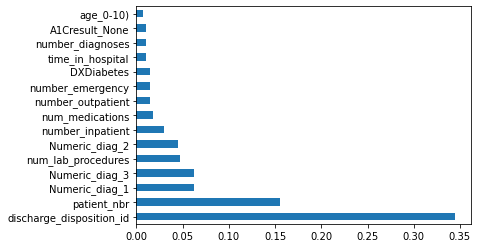

In [22]:
(pd.Series(abu_clf_best.feature_importances_, index=names)
   .nlargest(15)
   .plot(kind='barh'))

In [23]:
#feature importance

feature_importances = pd.DataFrame(abu_clf_best.feature_importances_,
                                   index = names,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
discharge_disposition_id,0.3450
patient_nbr,0.1550
Numeric_diag_3,0.0625
Numeric_diag_1,0.0625
num_lab_procedures,0.0475
...,...
num_procedures,0.0000
A1Cresult_8,0.0000
A1Cresult_7,0.0000
max_glu_serum_Norm,0.0000


# AdaBoost - reduced to 15 columns

In [24]:
X_train_ada15 = X_train_under[ADA15names]
print(X_train_ada15.info())

X_test_ada15 = X_test[ADA15names]
X_test_ada15 .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15712 entries, 0 to 15711
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   discharge_disposition_id   15712 non-null  int64  
 1   number_inpatient           15712 non-null  int64  
 2   Numeric_diag_1             15712 non-null  float64
 3   Numeric_diag_3             15712 non-null  float64
 4   time_in_hospital           15712 non-null  int64  
 5   number_diagnoses           15712 non-null  int64  
 6   Numeric_diag_2             15712 non-null  float64
 7   number_emergency           15712 non-null  int64  
 8   num_medications            15712 non-null  int64  
 9   Med_Spec_Emergency/Trauma  15712 non-null  int64  
 10  DXDiabetes                 15712 non-null  int32  
 11  Med_Spec_Cardiology        15712 non-null  int64  
 12  DXHTN_Kidney               15712 non-null  int32  
 13  DXPneumonia                15712 non-null  int

In [25]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,600,700],
'learning_rate':[0.2,0.4,0.6,0.8,1, 1.2, 1.4],              
'random_state':[0,27,42]}

# create Ada Boost model 
ab_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
ab_clf15 = RandomizedSearchCV(ab_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [26]:
ab_clf15.fit(X_train_ada15, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   58.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.2, 1.4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [27]:
print("Best parameter set found on training set:")
print()
print(ab_clf15.best_params_)
print("Best estimator set found on training set:")
print()
print(ab_clf15.best_estimator_)

# Save the best estimator statement for use below
ab_clf15_best = ab_clf15.best_estimator_
ab_clf15_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 300, 'learning_rate': 0.4}
Best estimator set found on training set:

AdaBoostClassifier(learning_rate=0.4, n_estimators=300, random_state=0)


AdaBoostClassifier(learning_rate=0.4, n_estimators=300, random_state=0)

#### Best parameters

AdaBoostClassifier(learning_rate=0.4, n_estimators=300, random_state=0)

In [28]:
y_pred_test_ab15 = ab_clf15_best.predict(X_test_ada15)

y_pred_class_test_ab15 = ab_clf15_best.predict_proba(X_test_ada15)

In [29]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test,y_pred_test_ab15))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_test,y_pred_test_ab15))

confusion matrix: 
[[17770  8765]
 [ 1464  1849]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     26535
           1       0.17      0.56      0.27      3313

    accuracy                           0.66     29848
   macro avg       0.55      0.61      0.52     29848
weighted avg       0.84      0.66      0.72     29848



In [30]:
# limit to probability for class = 1 
base_probs_ab15 = y_pred_class_test_ab15[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",metrics.roc_auc_score(y_test, base_probs_ab15))

ROC AUC score (test):  0.6650198943914009


In [31]:
y_pred_train_ab15 = ab_clf15_best.predict(X_train_ada15)

# limit to probability for class = 1 
y_pred_train_class_ab15 = ab_clf15_best.predict_proba(X_train_ada15)

base_probs_train_ab15 = y_pred_train_class_ab15[:,1]

print("confusion matrix: ")
print(metrics.confusion_matrix(y_train_under,y_pred_train_ab15))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_train_under,y_pred_train_ab15))

# calculate roc_auc_score
print("ROC AUC score (train): ",metrics.roc_auc_score(y_train_under, base_probs_train_ab15))
# calculate accuracy
#print("Accuracy (train): ",metrics.accuracy(y_train_under, base_probs_train_ab))

confusion matrix: 
[[5336 2520]
 [3270 4586]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      7856
           1       0.65      0.58      0.61      7856

    accuracy                           0.63     15712
   macro avg       0.63      0.63      0.63     15712
weighted avg       0.63      0.63      0.63     15712

ROC AUC score (train):  0.6835597802839087
